In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

## Получение данных

Будем работать с набором данных для задачи классификации - данные по сердечно сосудистым заболеваниям, довольно стандартный набор для изучения машинного обучения, но его нет в `sklearn'e`. Поэтому скачиваем данные со стороны, с google диска.

Ссылка на google drive: https://drive.google.com/file/d/1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G


В задаче предалагается предсказать наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра. Датасет сформирован 3 групп признаков:

Объективные признаки:
- Возраст (в днях)
- Рост
- Вес
- Пол

Результаты измерения:

- Артериальное давление верхнее и нижнее
- Холестерин (три группы: норма, выше нормы, значительно выше нормы)
- Глюкоза (три группы: норма, выше нормы, значительно выше нормы)

Субъективные признаки (бинарные):

- Курение
- Употребление Алкоголя
- Физическая активность

In [2]:
full_df = pd.read_csv('cardio.csv', ';')
full_df.head()

C:\Users\arina\AppData\Local\Temp\ipykernel_32984\3313206709.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  full_df = pd.read_csv('cardio.csv', ';')


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
full_features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
                 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
target = ['cardio']

In [4]:
full_df['age'] = round(full_df['age'] / 365)

Чтобы более наглядно смотреть, как обучается дерево решений возьмем только 5 объектов и 2 признака.

In [5]:
features = ['age', 'ap_hi']

In [6]:
df = full_df[features + target]
df = df.head(5)
df

,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1
4,48.0,100,0


In [7]:
X = df[features]
y = df[target]

## Что такое дерево решений?

С чем можно сравнить деревья решений? А их можно сравнить с игрой в "стикеры". 


<img src='https://i1.wp.com/nastolkoff.ru/wp-content/uploads/2018/08/1-26.jpg' width=400>


Когда на стикере пишешь имя знаменитости/ название животного/персонажа из игры и т.д., а затем клеешь на лоб другу. Друг должен с помощью вопросов, на которые можно давать ответ только да или нет, догадаться, а кто же написан на стикере.

Если вы играете в стикеры с именем публичной личности, то самый первый и самый логичный вопрос будет связан с полом человека, потому что в среднем 50% мужчин, 50% женщин и одним вопросом "мой загаданный человек такого-то пола?" можно отсечь 50% вариантов, как неправильные ответы. А затем продолжить задавать вопросы, пока в конечном счете не дойдете до одного человека.

Так же ведут себя наши деревья решений, они задают вопросы к данным, разбивая на подвыборки, чтобы докопаться до истины

Так давайте обучем одно дерево решений с помощью sklearn'a.

Инициализируем его для задачи классификации и обучим на признаках (`X`) и целевой переменной (`y`). По признакам модель будет запоминать закономерности, которые больше влияют на наличие сердечно-сосудистого заболевания.

In [8]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(random_state=1)
tree.fit(X, y)

DecisionTreeClassifier(random_state=1)

Теперь визуализируем наше обученное дерево решений. Из себя дерево решений представлет набор вопросов к данным.  Узлы (ноды), где как раз-таки находится вопрос - называются **вершинами**, в этом дереве у нас есть одна вершина, где хранится вопрос `ap_hi <= 120`.

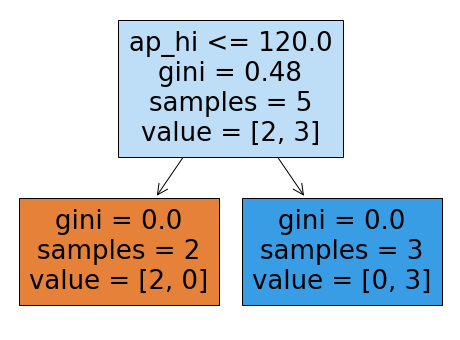

In [9]:
from sklearn.tree import plot_tree


plt.figure(figsize=(8, 6))
plot_tree(tree, feature_names=features, filled=True);


По этому вопросу идет разбиение выборки на две подвыборки: на левую, где условие удовлетворяется (*верхняя цифра давления действительно меньше либо равна 120*) и на правую, где условие не удовлетворяетсся (*где давление больше 120*).

Тем самым получаем ещё два узла, которые уже именуются **листами**, благодаря ним будем получать финальное предсказание модели.

В **левом листе** у нас ноходится два объекта и они вдвоем 0 класса, значит любой объект, у которого давление будет меньше или равно 120 попадет в этот конечный узел и будет считаться 0 классом.

А в **правом листе** находится три объекта и они все имеют метку класс 1. А значит, если возьмем новый объект, спросим у него давление и оно окажется больше 120, то предскажем ему класс 1.

Левая подвыборка, где условие удовлетворяется

In [10]:
df[df['ap_hi'] <= 120]

,age,ap_hi,cardio
0,50.0,110,0
4,48.0,100,0


Правая подвыборка, где условие не удовлетворяется

In [11]:
df[~(df['ap_hi'] <= 120)]

,age,ap_hi,cardio
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1


## Какие вопросы задает дерево решений?

В целом, смысл дерева поняли, теперь пора разобраться, как дерево решений понимает, какие вопросы нужно задавать.

In [12]:
import numpy as np

In [13]:
df

,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1
4,48.0,100,0


А на самом деле дерево действует в лоб и задает всевозможные вопросы, которые только можно задавать. Давайте приведем примеры вопросов.


### Вопросы с признаком age

Для начала с признаком возраста.

- age <= 50

Получаем две подвыборки, где слева 3 объекта, а справа 2.

In [14]:
condition = df['age'] <= 50
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
3,48.0,150,1
4,48.0,100,0


,age,ap_hi,cardio
1,55.0,140,1
2,52.0,130,1


- age <= 55

Вот этот вопрос нелогичный, так как они никак наши данные не разбивает, а кладет все объекты в одну подвыборку, так что его не считаем за нормальный вопрос.

In [15]:
condition = df['age'] <= 55
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1
4,48.0,100,0


,age,ap_hi,cardio


- age <= 52

Получаем две подвыборки, слева 4 объекта, а справа 1.

In [16]:
condition = df['age'] <= 52
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
2,52.0,130,1
3,48.0,150,1
4,48.0,100,0


,age,ap_hi,cardio
1,55.0,140,1


и остается только один вопрос, т.к. два последних объекта имеют одинаковое значение возраста
- age <= 48

Здесь разбиение 2 на 3.

In [17]:
condition = df['age'] <= 48
display(df[condition], df[~condition])

,age,ap_hi,cardio
3,48.0,150,1
4,48.0,100,0


,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1


Резюмируем по признаку возраста. Получили 3 валидных вопроса

### Вопросы с признаком ap_hi

Дальше с признаком ap_hi.

- ap_hi <= 110

Слева 2 объекта, справа 3

In [18]:
condition = df['ap_hi'] <= 110
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
4,48.0,100,0


,age,ap_hi,cardio
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1


- ap_hi <= 100

Слева 1 объект, справа 4

In [19]:
condition = df['ap_hi'] <= 100
display(df[condition], df[~condition])

,age,ap_hi,cardio
4,48.0,100,0


,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1


- ap_hi <= 140

Слева 4 объекта, справа 1

In [20]:
condition = df['ap_hi'] <= 140
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1
4,48.0,100,0


,age,ap_hi,cardio
3,48.0,150,1


- ap_hi <= 130

Слева 3 объекта, справа 2

In [21]:
condition = df['ap_hi'] <= 130
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
2,52.0,130,1
4,48.0,100,0


,age,ap_hi,cardio
1,55.0,140,1
3,48.0,150,1


И последний вопрос с признаком ap_hi

- ap_hi <= 150

Слева 5 объектов, справа 0, вопрос неправильный, потому что никакого раззбиения он нам не дает, так что его за вопрос не считаем.

In [22]:
condition = df['ap_hi'] <= 150
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1
4,48.0,100,0


,age,ap_hi,cardio


Итого, 3 вопроса про возраст и 4 вопроса про давление. Как из 7 вопросов найти самый успешный, а тут стоит поговорить про функционал качества, который будет сравнивать успешность разбиений.

## Как дерево решений обучается?

### Прирост информации

За функционал качества при работе с деревом решений принимается **прирост информации** (information gain):

$$Q(X_{m}, j, t) = H(X_{m}) - \frac{|X_{l}|}{|X_{m}|}H(X_{l}) - \frac{|X_{r}|}{|X_{m}|}H(X_{r}),$$


где $X_{m}$ - множество объектов, попавших в вершину на данном шаге, $X_{l}$ и $X_{r}$ - множества, попадающие в левое и правое поддерево после разбиения. $H(X)$ - _критерий информативности_. Он показывает неопределенность в данных, хаус, нечистоту. 

Задача обучения состоит в его минимизации и, соответственно, максимизации прироста информации.

Ещё критерии информативности нужно нормировать - домножить на долю объектов, ушедших в соответствующее подмножество. Например, если у нас множество в узле разбилось на два подмножества размером в 9990 объектов и 10 объектов, но при этом в первом подмножестве все объекты будут принадлежать к одному классу, а во втором - к разным, то в целом разбиение будет считаться хорошим, так как подавляющее большинство отсортировано правильно.

В деревьях для задачи классификации используются два основных критерия информативности для подсчета ошибки, которые оперируют вероятностями появления каждого класса:


Обозначим через $p_{k}$ долю объектов класса $k$ в выборке $X$:

$$p_{k} = \frac{1}{|X|}\sum_{i\in X}[y_{i} = k].$$



**Критерии информативности** для задачи классификации:
- _Энтропийный критерий_ или _энтропия Шеннона_ :

$$H(X) = - \sum^{K}_{k=1}p_{k}\text{log}_{2}p_{k}.$$

Минимум энтропии (0) достигается, когда все объекты относятся к одному класссу, а максимум - при равномерном распределении. В формуле полагается, что $0\text{log}_{2}0=0.$

- _Критерий Джини_ или _индекс Джини_:

$$H(X) = \sum^{K}_{k=1}p_{k}(1-p_{k}) = 1 - \sum_{k=1}^K{p_k^2} ,$$

где $K$ - количество классов в наборе данных $X$.

Его минимум (0) достигается, когда все объекты относятся к одному классу, а максимум - при равном содержании объектов всех класов.





### Энтропия Шеннона

In [23]:
df

,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1
4,48.0,100,0


У нас всё еще есть выборка из 5 людей. У двух из них нет заболевания (класс 0), а у трех оно имеется (класс 1). И мы хотим с помощью дерева решений найти такое разбиение, которое наиболее качественно разбивает выборку на две подвыборки, при этом в одной должны быть люди только с 0 классом, а во второй должны быть только люди с 1 классом.

Следить за таким порядком в подвыборках будет Энтропия или критерий Джини. Они позволяют посчитать количество неопределенности в наших данных.

Давайте разберемся в этом занятии с энтропией, а критерий Джини работает практически аналогичным образом.


$$H(X) = - \sum^{K}_{k=1}p_{k}\text{log}_{2}p_{k}.$$




Начнем с подсчета энтропии в исходной выборке из 5 объектов. У нас два объекта 0 класса и три объекта 1 класса.

In [24]:
class_0 = 2
class_1 = 3
total = class_0 + class_1

p_0 = class_0 / total
p_1 = class_1 / total
p_0, p_1

(0.4, 0.6)

Имеем вероятность быть 0 классом 0.4:
$$p_0 = \frac{2}{5} = 0.4$$

А вероятность быть 1 классом равняется 0.6
$$p_1 = \frac{3}{5} = 0.6$$

А значит в данной системе очень много неопределенности, ведь практически с вероятностью 50/50 объект может быть или 0 классом или 1. Создавая модель дерево решений, мы хотим задавать такие вопросы, которые будут отделять 1 класс от 0 и класть в отдельные подвыборки.

Давайте с такими вероятностями посчитаем энтропию. 

In [25]:
entropy_start = - (p_0 * np.log2(p_0) + p_1 * np.log2(p_1))
entropy_start

0.9709505944546686

Она получается довольно высокой (напомню, что в идеале критерий информативности энтропия должна стремиться к нулю), а значит раз энтропия высокая, то и определенности пока что нет.

Значит нужно разбивать выборку до этой самой определенности.

Благо список вопросов, которые можем тестировать, уже составляли.

Все наши найденные значения прироста информации будем записывать в таблицу.

In [26]:
results = pd.DataFrame(columns=['feature', 'value', 'IG'])
results

,feature,value,IG


#### Вопросы с признаком age

##### age <= 50

Получаем две подвыборки, где слева 3 объекта, а справа 2.

In [27]:
condition = df['age'] <= 50
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
3,48.0,150,1
4,48.0,100,0


,age,ap_hi,cardio
1,55.0,140,1
2,52.0,130,1


###### Левая подвыборка

Сначала считаем вероятности в левой подвыборке

In [28]:
df[condition]

,age,ap_hi,cardio
0,50.0,110,0
3,48.0,150,1
4,48.0,100,0


In [29]:
class_0 = 2
class_1 = 1
total = class_0 + class_1

p_0 = class_0 / total
p_1 = class_1 / total
p_0, p_1

(0.6666666666666666, 0.3333333333333333)

Имеем вероятность быть 0 классом в левой ветки:
$$p_0 = \frac{2}{3} = 0.667$$

А вероятность быть 1 классом равняется
$$p_1 = \frac{1}{3} = 0.334$$

А значит в данной ветке определенности побольше, чем было в исходной, ведь теперь с большей вероятностью объект может быть 0 классом и меньшей 1.

Объединяем вероятности в энтропию и она имеет значение меньше, чем у исходной энтропии (там было 0.97), но и это значение всё равно еще очень далеко от заветного 0.

In [30]:
entropy_left = - (p_0 * np.log2(p_0) + p_1 * np.log2(p_1))
entropy_left

0.9182958340544896

###### Правая подвыборка

Теперь считаем вероятности в правой подвыборке

In [31]:
df[~condition]

,age,ap_hi,cardio
1,55.0,140,1
2,52.0,130,1


In [32]:
class_0 = 0
class_1 = 2
total = class_0 + class_1

p_0 = class_0 / total
p_1 = class_1 / total
p_0, p_1

(0.0, 1.0)

Имеем вероятность быть 0 классом в правой ветке:
$$p_0 = \frac{0}{2} = 0$$

А вероятность быть 1 классом равняется
$$p_1 = \frac{2}{2} = 1$$

А значит в данной ветке определено всё, здесь находятся объекты только первого класса, нулевого класса здесь нет - вот это для нас самая лучшая ситуация.

Объединяем вероятности в энтропию (при этом считаем, что $0\text{log}_{2}0=0$ и считаем только второе слагаемое). Получили значение равное 0 - это идеальное значения, которое говорит нам, что нет неопределенности, нет энтропии.

In [33]:
entropy_right = - p_1 * np.log2(p_1)
entropy_right

-0.0

Получили в левой подвыборке энтропию 0.91, а во второй 0, теперь можем объединить эти значения в прирост информации.

###### Прирост информации

$$Q(X_{m}, j, t) = H(X_{m}) - \frac{|X_{l}|}{|X_{m}|}H(X_{l}) - \frac{|X_{r}|}{|X_{m}|}H(X_{r})$$


In [34]:
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
3,48.0,150,1
4,48.0,100,0


,age,ap_hi,cardio
1,55.0,140,1
2,52.0,130,1


При этом помним, что энтропии в подвыборках нужно нормировать. В левой оказалось 3 объекта из 5 исходных, а в правой их оказалось 2 тоже из 5.

In [35]:
IG = entropy_start - (3/5) * entropy_left - (2/5) * entropy_right
IG

0.4199730940219749

Итого прирост информации для вопроса age <= 50 равняется 0.41, чем это значение больше, тем лучше. Мы же хотим получить как можно больше полезной информации за счет разбиения данных на подвыборки.

Давайте запишем эти результаты в таблицу 

In [36]:
results = results.append({
    'feature': 'age',
    'value': 50,
    'IG': IG
}, ignore_index=True)

results

C:\Users\arina\AppData\Local\Temp\ipykernel_32984\1475736929.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


,feature,value,IG
0,age,50,0.419973


##### age <= 55
Едем дальше, но вспомнинаем, что этот вопрос был некорректным, ведь он делал разбиения.

In [37]:
condition = df['age'] <= 55
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1
4,48.0,100,0


,age,ap_hi,cardio


##### age <= 52

Получаем две подвыборки, слева 4 объекта, а справа 1.

In [38]:
condition = df['age'] <= 52
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
2,52.0,130,1
3,48.0,150,1
4,48.0,100,0


,age,ap_hi,cardio
1,55.0,140,1


###### Левая подвыборка

Сначала считаем вероятности в левой подвыборке

In [39]:
df[condition]

,age,ap_hi,cardio
0,50.0,110,0
2,52.0,130,1
3,48.0,150,1
4,48.0,100,0


In [40]:
class_0 = 2
class_1 = 2
total = class_0 + class_1

p_0 = class_0 / total
p_1 = class_1 / total
p_0, p_1

(0.5, 0.5)

Имеем вероятность быть 0 классом в левой ветки:
$$p_0 = \frac{2}{4} = 0.5$$

А вероятность быть 1 классом равняется
$$p_1 = \frac{2}{4} = 0.5$$

Имеем очень высокую неопределенность, 50/50 будет либо первый класс, либо нулевой.

Объединяем вероятности в энтропию и она единичная, хауса много, определенности нет.

In [41]:
entropy_left = - (p_0 * np.log2(p_0) + p_1 * np.log2(p_1))
entropy_left

1.0

###### Правая подвыборка

Теперь считаем вероятности в правой подвыборке

In [42]:
df[~condition]

,age,ap_hi,cardio
1,55.0,140,1


In [43]:
class_0 = 0
class_1 = 1
total = class_0 + class_1

p_0 = class_0 / total
p_1 = class_1 / total
p_0, p_1

(0.0, 1.0)

И здесь тоже вероятность быть 0 классом в правой ветке нулевая:
$$p_0 = \frac{0}{2} = 0$$

А вероятность быть 1 классом равняется
$$p_1 = \frac{2}{2} = 1$$

Здесь вообще один объект и он первого класса, значит здесь определенность высокая.

Считаем энтропию (при этом снова считаем, что $0\text{log}_{2}0=0$ и подсчитываем только второе слагаемое). Получили значение равное 0.

In [44]:
entropy_right = - p_1 * np.log2(p_1)
entropy_right

-0.0

Получили в левой подвыборке энтропию 1, а во второй 0, теперь можем объединить эти значения в прирост информации.

###### Прирост информации

$$Q(X_{m}, j, t) = H(X_{m}) - \frac{|X_{l}|}{|X_{m}|}H(X_{l}) - \frac{|X_{r}|}{|X_{m}|}H(X_{r})$$


In [45]:
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
2,52.0,130,1
3,48.0,150,1
4,48.0,100,0


,age,ap_hi,cardio
1,55.0,140,1


Энтропию в подвыборках нормируем. В левой оказалось 4 объекта из 5 исходных, а в правой их оказалось 1 из 5.

In [46]:
IG = entropy_start - (4/5) * entropy_left - (1/5) * entropy_right
IG

0.17095059445466854

Итого прирост информации для вопроса age <= 52 равняется 0.17, что меньше, чем прирост в вопросе с возрастом age <= 50.

Тоже запишем результат в таблицу 

In [47]:
results = results.append({
    'feature': 'age',
    'value': 52,
    'IG': IG
}, ignore_index=True)

results

C:\Users\arina\AppData\Local\Temp\ipykernel_32984\82619183.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


,feature,value,IG
0,age,50,0.419973
1,age,52,0.170951


##### age <= 48
и остается только один вопрос.

Здесь разбиение 2 на 3.

In [48]:
condition = df['age'] <= 48
display(df[condition], df[~condition])

,age,ap_hi,cardio
3,48.0,150,1
4,48.0,100,0


,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1


Хватит уже считать критерии информативности и прирост информации руками, давайте сделаем две вспомогательные функции для подсчета энтропии и прироста информации.

In [49]:
# Расчет энтропии

def entropy(labels):
    """
    на вход labels - целевые значения
    на выходе подсчитанная энтропия 
    """
    labels = list(labels)

    #  подсчет количества объектов разных классов
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчет критерия
    ent = 0
    for label in classes:
        p = classes[label] / len(labels)
        ent += p * np.log2(p)
        
    return -ent

In [50]:
# Расчет прироста

def gain(left_labels, right_labels, root_labels):

    # доля выборки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    IG = entropy(root_labels) - p * entropy(left_labels) - (1 - p) * entropy(right_labels)

    return IG

###### Прирост информации

Передаем наши целевые значения в подвыборках и исходной выборки в функция для подсчета прироста информации.

In [51]:
IG = gain(df[condition]['cardio'], df[~condition]['cardio'], df['cardio'])
IG

0.01997309402197489

In [52]:
display(df[condition], df[~condition])

,age,ap_hi,cardio
3,48.0,150,1
4,48.0,100,0


,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1


Прирост информации для вопроса age <= 48 равняется 0.01, что совсем маленькое значение по сравнению с предыдущими.

Тоже запишем результат в таблицу 

In [53]:
results = results.append({
    'feature': 'age',
    'value': 48,
    'IG': IG
}, ignore_index=True)

results

C:\Users\arina\AppData\Local\Temp\ipykernel_32984\2455523651.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


,feature,value,IG
0,age,50,0.419973
1,age,52,0.170951
2,age,48,0.019973


Резюмируем по признаку возраста. Получили 3 валидных вопроса и их три подсчитанные прироста информации.

#### Вопросы с признаком ap_hi

##### ap_hi <= 110

Слева 2 объекта, справа 3. Уже видим на моменте разбиения, что что-то интересное намечается, в одной выборке только 0, во второй только 1, идеальная определенность.

In [54]:
condition = df['ap_hi'] <= 110
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
4,48.0,100,0


,age,ap_hi,cardio
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1


###### Прирост информации

Но проверим эти хорошие результаты и с помощью прироста информации. Передаем наши целевые значения в подвыборках и исходной выборки в функция для подсчета прироста информации.

In [55]:
IG = gain(df[condition]['cardio'], df[~condition]['cardio'], df['cardio'])
IG

0.9709505944546686


Прирост информации для вопроса ap_hi <= 110 равняется 0.97, что равняется исходной стартовой энтропии среди всех объектов. Это значит, что этим вопросом мы получили всю нужную для нас информацию.

Запишем этот идеальный результат в таблицу. 

In [56]:
results = results.append({
    'feature': 'ap_hi',
    'value': 110,
    'IG': IG
}, ignore_index=True)

results

C:\Users\arina\AppData\Local\Temp\ipykernel_32984\3257547875.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


,feature,value,IG
0,age,50,0.419973
1,age,52,0.170951
2,age,48,0.019973
3,ap_hi,110,0.970951


#####  ap_hi <= 100

Слева 1 объект, справа 4

In [57]:
condition = df['ap_hi'] <= 100
display(df[condition], df[~condition])

,age,ap_hi,cardio
4,48.0,100,0


,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1


###### Прирост информации

In [58]:
IG = gain(df[condition]['cardio'], df[~condition]['cardio'], df['cardio'])
IG

0.3219280948873623

Прирост информации для вопроса ap_hi <= 100 равняется 0.32, тоже неплохо, но вот с предудущим результатом походу уже ничего не сравнится.

Запишем результат в таблицу. 

In [59]:
results = results.append({
    'feature': 'ap_hi',
    'value': 100,
    'IG': IG
}, ignore_index=True)

results

C:\Users\arina\AppData\Local\Temp\ipykernel_32984\1925750101.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


,feature,value,IG
0,age,50,0.419973
1,age,52,0.170951
2,age,48,0.019973
3,ap_hi,110,0.970951
4,ap_hi,100,0.321928


##### ap_hi <= 140

Слева 4 объекта, справа 1

In [60]:
condition = df['ap_hi'] <= 140
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1
4,48.0,100,0


,age,ap_hi,cardio
3,48.0,150,1


###### Прирост информации

In [61]:
IG = gain(df[condition]['cardio'], df[~condition]['cardio'], df['cardio'])
IG

0.17095059445466854

Ну уж совсем печальный прирост. При вопросе ap_hi <= 140 равняется 0.17.

Запишем этот идеальный результат в таблицу. 

In [62]:
results = results.append({
    'feature': 'ap_hi',
    'value': 140,
    'IG': IG
}, ignore_index=True)

results

C:\Users\arina\AppData\Local\Temp\ipykernel_32984\2141255655.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


,feature,value,IG
0,age,50,0.419973
1,age,52,0.170951
2,age,48,0.019973
3,ap_hi,110,0.970951
4,ap_hi,100,0.321928
5,ap_hi,140,0.170951


##### ap_hi <= 130

Слева 3 объекта, справа 2

In [63]:
condition = df['ap_hi'] <= 130
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
2,52.0,130,1
4,48.0,100,0


,age,ap_hi,cardio
1,55.0,140,1
3,48.0,150,1


###### Прирост информации

In [64]:
IG = gain(df[condition]['cardio'], df[~condition]['cardio'], df['cardio'])
IG

0.4199730940219749

Прирост информации для вопроса ap_hi <= 130 равняется 0.41.

In [65]:
results = results.append({
    'feature': 'ap_hi',
    'value': 130,
    'IG': IG
}, ignore_index=True)

results

C:\Users\arina\AppData\Local\Temp\ipykernel_32984\1135121396.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


,feature,value,IG
0,age,50,0.419973
1,age,52,0.170951
2,age,48,0.019973
3,ap_hi,110,0.970951
4,ap_hi,100,0.321928
5,ap_hi,140,0.170951
6,ap_hi,130,0.419973


##### ap_hi <= 150

И последний вопрос с признаком ap_hi


Слева 5 объектов, справа 0, вопрос неправильный, потому что никакого раззбиения он нам не дает, так что его за вопрос не считаем.

In [66]:
condition = df['ap_hi'] <= 150
display(df[condition], df[~condition])

,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1
4,48.0,100,0


,age,ap_hi,cardio


Итого, 3 вопроса про возраст и 4 вопроса про давление. Можем вывести таблицу с приростами информации, но думаю своего победителя мы уже нашли.

In [67]:
results

,feature,value,IG
0,age,50,0.419973
1,age,52,0.170951
2,age,48,0.019973
3,ap_hi,110,0.970951
4,ap_hi,100,0.321928
5,ap_hi,140,0.170951
6,ap_hi,130,0.419973


Это вопрос ap_hi <= 110 - у него максимальный прирост информации из всевозможных вопросов, которые мы назадавали. Значит его и будем использовать для нашего дерева решений.

То, что мы с вами сделали - это ооочень маленькая часть всего построения дерева решений, мы нашли только один вопрос - а у деревьев их может быть десятки, сотни, тысячи и еще больше, зависит от сложности задачи.

И еще одно интересное замечание. Когда мы строили с вами дерево решений из sklearn'a, то самый лучший вопрос получался age <= 120, а у нас такого вопроса не было.

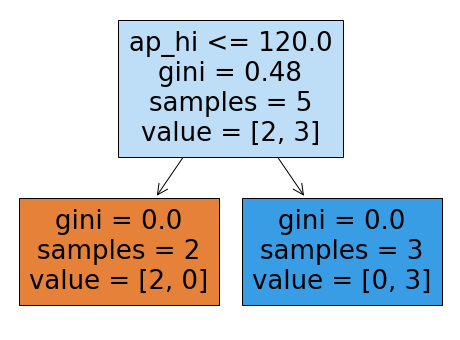

In [68]:
plt.figure(figsize=(8, 6))
plot_tree(tree, feature_names=features, filled=True);

Это потому, что можно еще немного иначе задавать вопросы. Брать не буквально уникальные значения из признака, а среднее между уникальными отсортированными значениями.

In [69]:
sorted(df['ap_hi'].unique())

[100, 110, 130, 140, 150]

И могли бы задавать такие вопросы

In [70]:
display(
    f'ap_hi <= {(100 + 110) / 2}',
    f'ap_hi <= {(110 + 130) / 2}',
    f'ap_hi <= {(130 + 140) / 2}',
    f'ap_hi <= {(140 + 150) / 2}',
)

'ap_hi <= 105.0'

'ap_hi <= 120.0'

'ap_hi <= 135.0'

'ap_hi <= 145.0'

При этом разбиения мы будем получать такие же, как и при наших вопросах, к примеру, вопрос по такое методике ap_hi <= 105 (среднее между 100 и 110).

In [71]:
condition = df['ap_hi'] <= 105
display(df[condition], df[~condition])

,age,ap_hi,cardio
4,48.0,100,0


,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1


Это тоже самое, что наш вопрос ap_hi <= 100.

In [72]:
condition = df['ap_hi'] <= 100
display(df[condition], df[~condition])

,age,ap_hi,cardio
4,48.0,100,0


,age,ap_hi,cardio
0,50.0,110,0
1,55.0,140,1
2,52.0,130,1
3,48.0,150,1


Так что можно находить лучшие вопросы:
1. через уникальные значения в признаке
2. через среднее арифметическое уникальных значений в признаке

### Процесс построения дерева решений

Возьмем выборку чуть побольше, чтобы дерево решений имело больше вершин (узлы с вопросами) и листов (узлы с предсказаниями).

In [73]:
X = full_df.iloc[:10][features]
y = full_df.iloc[:10][target]

Первым делом получился вопрос `ap_hi <= 125`, в этой вершине находится 10 объектов (`samples=10`), из которых 6 относится к классу 0 и 4 относятся к классу 1 (`value=[6, 4]`). Кстати здесь энтропия высокая, равная 0.971.

Затем задается вопрос, где получился самый большой прирост информации и делается разбиение на две подвыборки.

Левая получилась из 5 объектов (`samples=5`), при чем они все являются объектами 0 класса, так что у них энтропия равняется 0, определено всё, если объект оказывается в этом листе, то 100% он будет нулевым классом, сделать энтропию меньше нуля мы чисто физически не можем, поэтому оставим в покое эту ветку и пойдем к правой.

В ней так же 5 объектов, но один - это 0 класс, а четверо - это объекты 1 класса, так что энтропия не нулевая, вот здесь и продолжаем задавать вопросы, с помощью перебора, постоянно считая энтропию и объединяя их в прирост информации, где он получился больше, этот вопрос и берем.<br>
Оказалось, что самый большой прирост информации с вопросом `age <= 58`.

И так далее, пока не встретим какой-либо критерий останова.

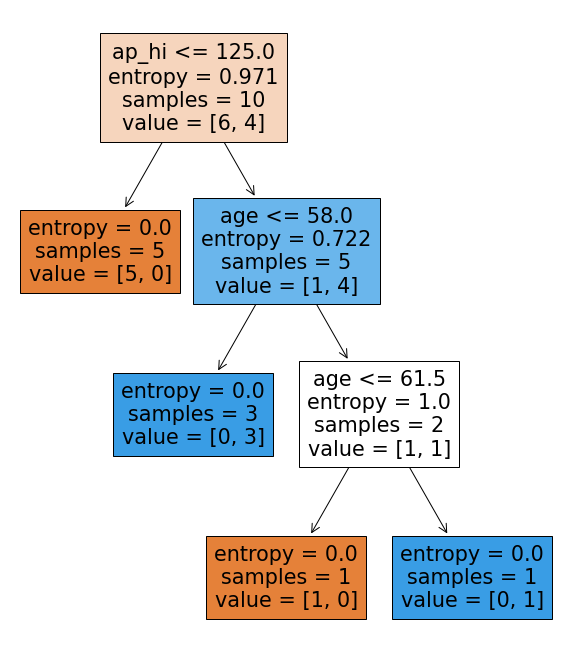

In [74]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X, y)

plt.figure(figsize=(10, 12))
plot_tree(tree, feature_names=features, filled=True);

Про дерево для решения задачи регрессии можно посмотреть [видео](https://youtu.be/0mMeaC3gjNI) на youtube.